In [20]:
import numpy as np
from matplotlib import pyplot as plt, cm as cm

%matplotlib inline

In [34]:
bpass_dir = '../data/BPASS/BPASSv2.1_imf135_300/'

logages,O_gb,Of_gb,B_gb,A_gb,YSG_gb,K_gb,M_gb,WNH_gb,WN_gb,WC_gb,O_lb,Of_lb,B_lb,A_lb,YSG_lb,K_lb,M_lb,WNH_lb,WN_lb,WC_lb = np.genfromtxt(bpass_dir+'numbers-bin.z014.dat',unpack=True)
logages,O_gs,Of_gs,B_gs,A_gs,YSG_gs,K_gs,M_gs,WNH_gs,WN_gs,WC_gs,O_ls,Of_ls,B_ls,A_ls,YSG_ls,K_ls,M_ls,WNH_ls,WN_ls,WC_ls = np.genfromtxt(bpass_dir+'numbers.z014.dat',unpack=True)

In [35]:
WR_b = WNH_gb + WN_gb + WC_gb + WNH_lb + WN_lb + WC_lb
RSG_b = K_gb + M_gb
WR_s = WNH_gs + WN_gs + WC_gs + WNH_ls + WN_ls + WC_ls
RSG_s = K_gs + M_gs

In [36]:
cmap = cm.get_cmap('viridis')

/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide
/Users/carina/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide
/Users/carina/anaconda/lib/python3.5/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


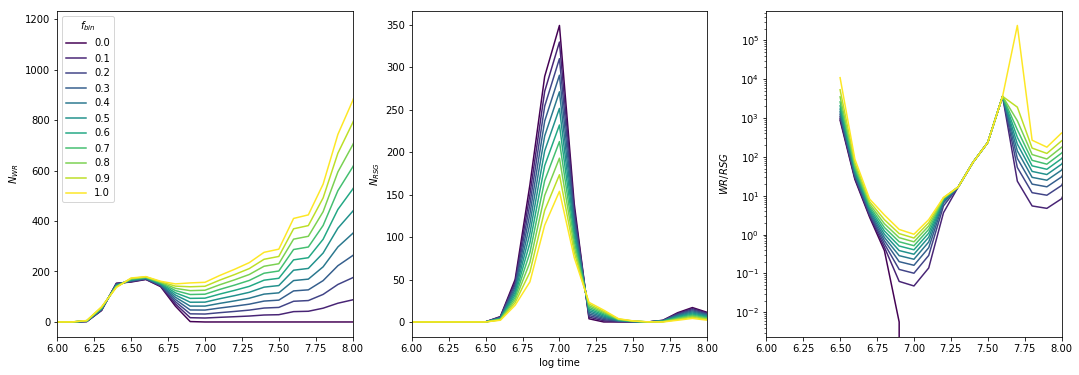

In [41]:
fig,ax = plt.subplots(1,3,figsize=(18,6))
for f_bin in np.linspace(0,1,11):
    WR = f_bin*WR_b + (1-f_bin)*WR_s
    RSG = f_bin*RSG_b + (1-f_bin)*RSG_s
    ax[0].plot(logages,WR,c=cmap(f_bin),label=f_bin)
    ax[1].plot(logages,RSG,c=cmap(f_bin),label=f_bin)
    ax[2].plot(logages,WR/RSG,c=cmap(f_bin))
    
ax[0].set(xlim=(6,8),ylabel='$N_{WR}$')
ax[1].set(xlim=(6,8),xlabel='log time',ylabel='$N_{RSG}$')
ax[2].set(yscale='log', xlim=(6,8),ylabel='$WR/RSG$')
ax[0].legend(title='$f_{bin}$')

plt.savefig('../plots/wr_rsg.eps')